# Classifying Emotions with Brainwaves

## What is this project?

This notebook shows how we can use brainwave data (EEG) to guess what kind of emotion someone is feeling — like happy, sad, calm, or angry — using machine learning.

## What is EEG?

EEG stands for **Electroencephalography**. It’s a way to measure the tiny electrical signals our brains make. These signals change depending on how we're feeling or what we’re doing.

### EEG "bands" — different types of brain signals:
- **Delta**: slowest waves (when you’re deeply asleep)
- **Theta**: relaxed or meditative state
- **Alpha**: calm and peaceful (but awake)
- **Beta**: thinking, alert, active
- **Gamma**: learning or processing

We look at the power of each wave (like how strong each one is) and use those as features in machine learning.

---

## About the Dataset

**Source**: [Kaggle: EEG Brainwave Dataset - Feeling Emotions](https://www.kaggle.com/datasets/birdy654/eeg-brainwave-dataset-feeling-emotions)

- The data comes from **music listening sessions**. People listened to songs and reported how they felt.
- Each row in the dataset shows **brainwave readings** from that session.
- The feelings (called "labels") are: **happy**, **sad**, **angry**, and **calm**.

### Who are the people in the dataset?

The original Kaggle page doesn't give detailed personal info (like age or gender), but it mentions:
- EEG signals were collected from **participants listening to music**.
- The EEG device used is called **EMOTIV Epoc+** (a wearable headset).
- There are over **10,000 rows** in the dataset — each from a 10-second window of brain activity.


In [5]:
# Load libraries for data and plotting
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the scripts/ folder to the path for use of custom funcs
sys.path.append("../scripts")

# Import functions from the scripts in scripts folder
from preprocess import load_data, preprocess_data
from train_model import split_data, train_random_forest, evaluate_model, plot_confusion_matrix, plot_feature_importance


In [8]:
# Load the brainwave data from a CSV file
file_path = '../data/emotions.csv'
df = load_data(file_path)

# Look at the first few rows
print("Here are the first few rows of the brainwave dataset:")
print(df.head())

# Check how many samples and what emotions there are
print("\nThere are", df.shape[0], "samples (rows)")
print("These are the types of emotions (labels):", df['label'].unique())


Here are the first few rows of the brainwave dataset:
   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1

In [9]:
# This step separates the brainwave features from the emotion labels
# It also scales the brainwave values so they're easier for the model to learn from

X, y = preprocess_data(df)


In [10]:
# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = split_data(X, y)


In [11]:
# Train a Random Forest model — a group of decision trees that vote together!
clf = train_random_forest(X_train, y_train)


### What is the random forest model? 

A decision tree is like a flowchart that asks yes/no questions about features (like “Is alpha wave power > 5?”). A random forest builds many different trees, each looking at random parts of the data and features.
That way, when it's time to classify a new brainwave sample, all trees "vote" for an emotion, and the most common vote wins. This method reduces mistakes from any one tree and works well for complex data.

In [12]:
# Use the trained Random Forest to predict emotions from the test data
y_pred = evaluate_model(clf, X_test, y_test)


Accuracy: 0.9882903981264637

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.97      0.99      0.98       143
     NEUTRAL       1.00      1.00      1.00       148
    POSITIVE       0.99      0.97      0.98       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



### Model Performance Summary

- The model achieved **99% accuracy**, meaning it correctly predicted the emotion in 99 out of 100 cases.
- **Precision** shows how often the model was correct when it predicted each emotion:
  - NEGATIVE: 97%
  - NEUTRAL: 100%
  - POSITIVE: 99%
- **Recall** shows how well the model found all true examples of each emotion:
  - NEGATIVE: 99%
  - NEUTRAL: 100%
  - POSITIVE: 97%
- The **F1-score** (balance of precision and recall) is very high (around 98-100%), indicating excellent overall performance.
- The model performs well across all three emotions with minimal mistakes.

### What is the F1 Score?

The **F1 score** is a way to measure how well a model balances two important things:

- **Precision**: How many of the model's positive predictions were actually correct.
- **Recall**: How many of the actual positive cases the model was able to find.

The F1 score combines precision and recall into a single number, using their harmonic mean. It gives a balanced measure, especially useful when you want to consider both false positives and false negatives.

- An F1 score close to 1 (or 100%) means the model is doing a great job finding positive cases *and* making accurate predictions.
- If the F1 score is low, it means either precision or recall (or both) are poor.

In simple terms:  
**F1 score = High only if both precision and recall are high!**


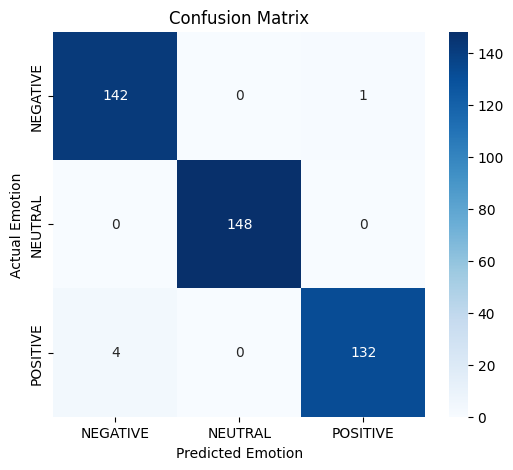

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the emotion labels (in the order your model predicts them)
labels = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']

# Calculate the confusion matrix:
# This compares the true labels (y_test) with the model's predictions (y_pred)
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Now, let's visualize the confusion matrix as a heatmap
plt.figure(figsize=(6,5))

# sns.heatmap will create a color-coded table
# annot=True adds the actual numbers in each box
# fmt='d' ensures numbers are formatted as integers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels to the plot for clarity
plt.xlabel('Predicted Emotion')
plt.ylabel('Actual Emotion')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


### Interpretation of the Confusion Matrix

The confusion matrix for the model's predictions is:

|                  | Predicted NEGATIVE | Predicted NEUTRAL | Predicted POSITIVE |
|------------------|--------------------|-------------------|--------------------|
| **Actual NEGATIVE** | 142                | 0                 | 1                  |
| **Actual NEUTRAL**  | 0                  | 148               | 0                  |
| **Actual POSITIVE** | 4                  | 0                 | 132                |

**What this means:**

- **Actual NEGATIVE:**  
  - 142 samples were correctly predicted as NEGATIVE.  
  - 1 sample was incorrectly predicted as POSITIVE.  
  - No samples were misclassified as NEUTRAL.

- **Actual NEUTRAL:**  
  - All 148 NEUTRAL samples were correctly predicted.  
  - No misclassifications for this category.

- **Actual POSITIVE:**  
  - 132 samples were correctly predicted as POSITIVE.  
  - 4 samples were misclassified as NEGATIVE.  
  - No samples were misclassified as NEUTRAL.

**Summary:**

- The model performs very well with most samples correctly classified.
- The biggest source of error is confusing some POSITIVE samples as NEGATIVE.
- NEUTRAL emotions were perfectly classified in this test set.
- Overall, this indicates strong model accuracy with minor mistakes mostly between POSITIVE and NEGATIVE classes.


### Discussion and Conclusion

The Random Forest model demonstrated excellent performance in classifying emotions from EEG brainwave data. With an overall accuracy of approximately 99%, the model effectively distinguished between NEGATIVE, NEUTRAL, and POSITIVE emotional states.

The confusion matrix highlights that most misclassifications occurred between POSITIVE and NEGATIVE emotions, which may share overlapping features in the EEG signals. The NEUTRAL class was perfectly identified, indicating distinct patterns for this emotional state.

These results suggest that EEG signals contain meaningful information for emotion recognition and that machine learning models like Random Forest can leverage these patterns with high accuracy. However, further work could explore more advanced models or feature engineering to reduce confusion between similar emotional states.

In real-world applications, such models could support affective computing, mental health monitoring, and brain-computer interfaces by providing reliable emotion detection from EEG data.
